In [194]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [260]:
import pandas as pd
import seaborn as sns

In [261]:
df = pd.read_csv('../train.csv')

In [262]:
df[df.Prediction=='s'].shape

(85667, 32)

In [263]:
df[df.Prediction=='b'].shape

(164333, 32)

In [264]:
feat_names = [col for col in df.columns if col not in ['Id','Prediction']]

for colname in feat_names:
    df.loc[df[colname]==-999.000,[colname]]=df[colname][df[colname]!=-999.000].median()

In [241]:
df.describe()

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,120.417434,49.239819,81.181982,57.895962,2.193104,268.220619,-0.411629,2.373100,18.917332,...,-0.010119,209.797178,0.979176,77.124366,-0.001966,-0.020629,50.739149,-0.010535,-0.001879,73.064591
std,72168.927986,52.859218,35.344886,40.828691,63.655682,0.948104,224.229668,1.948520,0.782911,22.273494,...,1.812223,126.499506,0.977426,47.939899,1.382703,1.405084,17.792135,1.094446,0.978743,98.015662
min,100000.000000,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
25%,162499.750000,95.665000,19.241000,59.388750,14.068750,2.107000,225.885000,-0.244000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,57.439000,-0.433000,-0.556000,47.902000,-0.010000,-0.002000,0.000000
50%,224999.500000,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,2.107000,225.885000,-0.244000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,47.902000,-0.010000,-0.002000,109.933750
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [265]:
sum(df["DER_mass_MMC"]==-999.00)

0

In [266]:
df['DER_mass_jet_jet_2'] = df['DER_mass_jet_jet']**2
df['DER_prodeta_jet_jet_2'] = df['DER_prodeta_jet_jet']**2
df['DER_met_phi_centrality_2'] = df['DER_met_phi_centrality']**2
df['DER_lep_eta_centrality_2'] = df['DER_lep_eta_centrality']**2
DER_features = [colname for colname in df.columns if colname.startswith("DER")]

In [267]:
# Assuming same lines from your example
cols_to_norm = DER_features
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: x/x.std())

In [269]:
df.shape

(250000, 36)

In [270]:
df.to_csv('../train_sel.csv',index=False)

In [214]:
selected_feats = sorted(['DER_mass_jet_jet_2','DER_prodeta_jet_jet_2','DER_met_phi_centrality_2','DER_lep_eta_centrality_2',
                        'DER_pt_ratio_lep_tau','DER_sum_pt'])

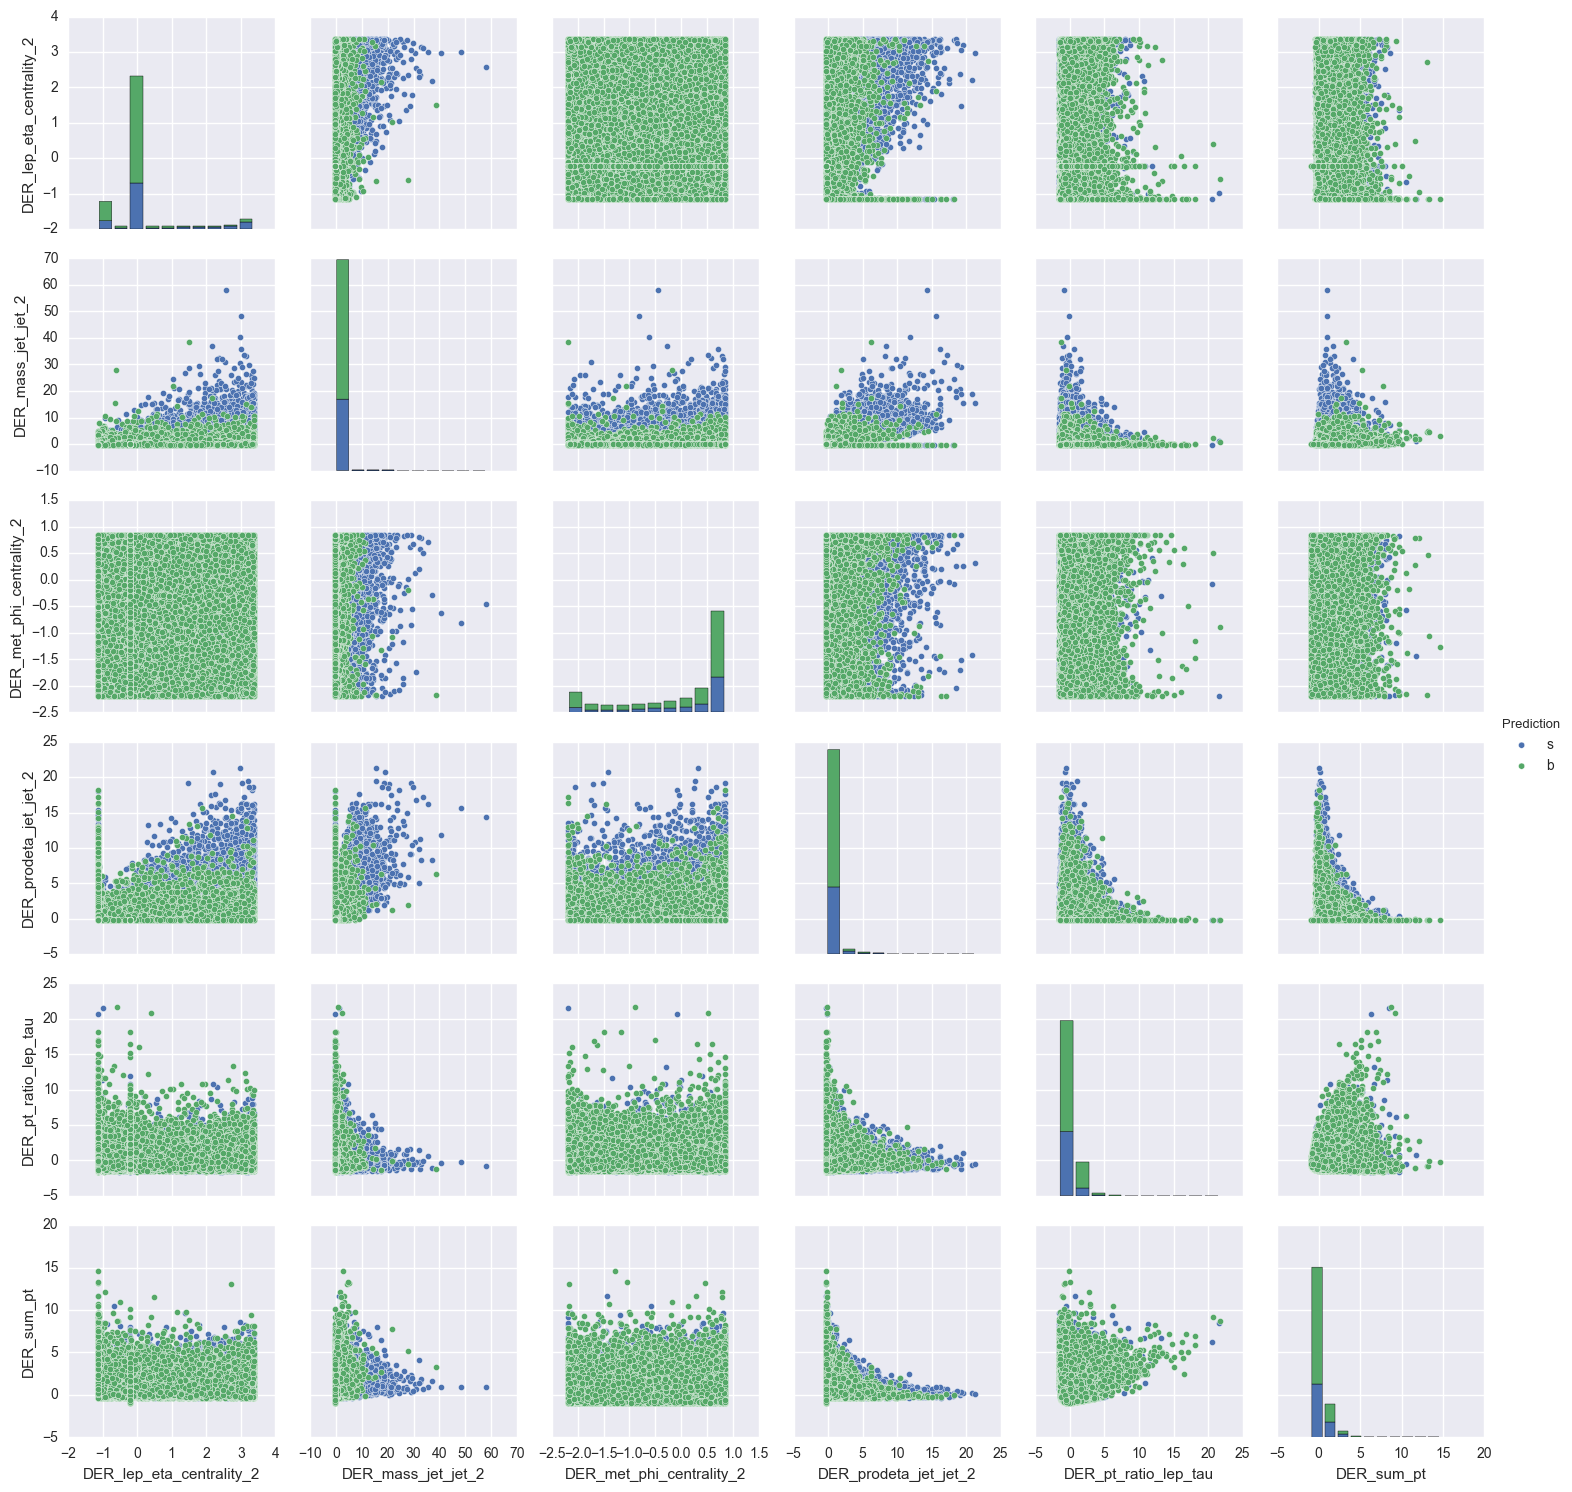

In [188]:
#plt.figure()
#sns.pairplot(data=df[selected_feats+["Prediction"]], hue="Prediction")
#plt.savefig("pair_plots_phys.jpg",format='jpg')

## Test data

In [271]:
df = pd.read_csv('../test.csv')

In [272]:
feat_names = [col for col in df.columns if col not in ['Id','Prediction']]

for colname in feat_names:
    df.loc[df[colname]==-999.000,[colname]]=df[colname][df[colname]!=-999.000].median()

In [273]:
df['DER_mass_jet_jet_2'] = df['DER_mass_jet_jet']**2
df['DER_prodeta_jet_jet_2'] = df['DER_prodeta_jet_jet']**2
df['DER_met_phi_centrality_2'] = df['DER_met_phi_centrality']**2
df['DER_lep_eta_centrality_2'] = df['DER_lep_eta_centrality']**2
DER_features = [colname for colname in df.columns if colname.startswith("DER")]

In [274]:
# Assuming same lines from your example
cols_to_norm = DER_features
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.max() - x.min()))
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: x/x.std())

In [275]:
df.shape

(568238, 36)

In [276]:
df.to_csv('../test_sel.csv',index=False)